# Predicting employee turnover

The following notebook is describing how to predict employee turnover (i.e. attrition or churn) using a dataset [available on kaggle](https://www.kaggle.com/ludobenistant/hr-analytics). The website also provides the metadata - the description of the dataset variables. Apart from this analysis, you may want to read a notebook developed by the top contributor of the dataset on kaggle [here](https://www.kaggle.com/randylaosat/predicting-employee-kernelover/notebook).

Let's start. First we will import the necessary libraries (pandas for reading and manipulating the dataset and matplotlib and seaborn for visualization). Then, once we read the data, we will convert the column salary into numerical form (low-0, medium-1, high-2) and the column sales into dummies for each department separately. Please note, that the column titled sales is showing the department of the employee (e.g. sales, HR, IT etc). The correct name for this column would be department, yet the dataset developer mistakenly called it sales. Thus, please do not be confused by the name of the dataset.

After getting the datasets ready we will develop and then visualize the correlation matrix and only then apply the model. Based on the fact, that our target is to predict whether an employee will leave (1) or not (0), we have to use a classification algorithm. The algorithm that this notebook is using is called Decision Tree. To read more about the algorithm, please refer to the book chapter in the moodle. Let's go to the code.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
data = pd.read_csv("turnover.csv")
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [3]:
# converting salary into categories
# first we will say that the column present categories,
# then we will the correct order of that categories
# in the end we will ask python to conver the categories into codes
data["salary"] = data["salary"].astype('category').cat.reorder_categories(['low', 'medium', 'high']).cat.codes
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,1,0.38,0.53,2,157,3,0,0,sales,0
1,1,0.80,0.86,5,262,6,0,0,sales,1
2,1,0.11,0.88,7,272,4,0,0,sales,1
3,1,0.72,0.87,5,223,5,0,0,sales,0
4,1,0.37,0.52,2,159,3,0,0,sales,0


In [4]:
# converting department into dummies
department = pd.get_dummies(data["sales"])
department.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [5]:
# dropping the "old" sales, as we do not need it anymore
data = data.drop(["sales"],axis=1)
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,0.38,0.53,2,157,3,0,0,0
1,1,0.80,0.86,5,262,6,0,0,1
2,1,0.11,0.88,7,272,4,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0


In [6]:
# creating correlation matrix
data.corr()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.157898
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.050022
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,-0.013002
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,-0.001803
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002242
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.048715
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.009247
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.098119
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,1.000000


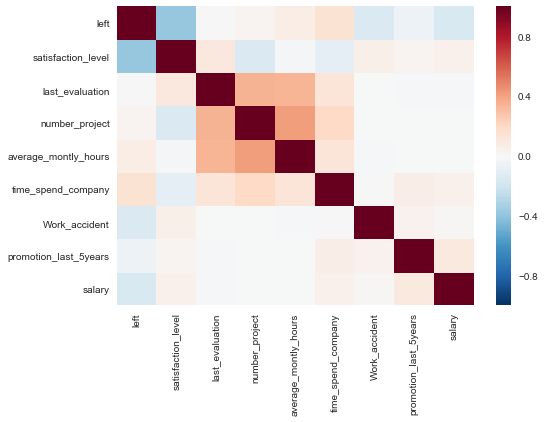

In [7]:
# plotting the correlation matrix
# as seaborn is based on matplotlib, we need to use plt.show() to see the plot
sns.heatmap(data.corr())
plt.show()

In [8]:
# checking the missing values
# ass you see we do not have any. Perfect!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
left                     14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int8
dtypes: float64(2), int64(6), int8(1)
memory usage: 952.2 KB


In [9]:
# descriptive analytics
data.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,2.000000


In [10]:
# joining the departments
data = data.join(department)
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,1,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
# learning the percentage of leavers
data["left"].value_counts()/len(data)*100

0    76.191746
1    23.808254
Name: left, dtype: float64

# Making prediction with Decision Trees

Excellent, after this preliminary analysis we are now ready to apply the Decision Tree model to our data. As any other machine learning model, the Decision Tree Classifier is available in sklean. Please note, we will use an argument called random_state which is an optional argument: it is just making sure that all of us have the same randomness, i.e. we will get the same results on different computers. It is not important what value you use for that random_state argument, but what is important is to have same number everywhere. Let's use 42.

In [12]:
# importing the model
from sklearn.tree import DecisionTreeClassifier

In [13]:
# initializing the model
model = DecisionTreeClassifier(random_state=42)

In [14]:
# setting the inputs and output
# inputs are everything except the column left
# output is the column left
inputs = data.iloc[:,1:]
output = data["left"]

In [15]:
# fitting the model
model.fit(inputs,output)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [16]:
# checking the accuracy
model.score(inputs,output)*100

100.0

In [21]:
# importing the lib for exporting tree visualization code
from sklearn.tree import export_graphviz

In [22]:
# exporting the tree graph and then visualizing in webgraphviz.com
export_graphviz(model,"tree.dot")

# Overfitting

Generally, one should not get happy with this result. In reality no algorithm can be 100% correct, thus we did not only fit, we overfit our model, i.e. our predictions are 100% correct for our dataset, yet, they will not work outside of it (e.g. if an employer is promoted his inputs will be changed and we will not be able to use this model for him). So we need to have a model that is not overfitting. In order to do that we need to "cut" (or prune) the tree. This can be done by using one more optional argument called max_depth which is showing the maximum level of branches for a tree. Let's use 5 here.

In [23]:
# building new model with a max_depth specification
model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
model_5.fit(X_train,y_train)
model_5.score(X_test,y_test)*100

97.022222222222226

In [25]:
export_graphviz(model_5,"tree_5.dot")

As you can see this 2nd tree is much shorter than the previous one and yet it has 97% accuracy. Let's now use the prediction results to learn the importance of each variable. We will construct a new dataframe from those importances and sort it to understand the top features/variables.

# Getting importances

In [30]:
# building a dataframe with importances
df = pd.DataFrame(index=list(data)[1:],data=model.feature_importances_)
df

,0
satisfaction_level,0.496668
last_evaluation,0.153570
number_project,0.099747
average_montly_hours,0.089723
time_spend_company,0.140087
Work_accident,0.000800
promotion_last_5years,0.000018
salary,0.006170
IT,0.001719
RandD,0.000757


In [31]:
# sorting values by the only column we have in a descending order
df.sort_values(by=0, ascending=False)

,0
satisfaction_level,0.496668
last_evaluation,0.153570
time_spend_company,0.140087
number_project,0.099747
average_montly_hours,0.089723
salary,0.006170
support,0.003739
technical,0.003072
IT,0.001719
hr,0.001190


As you can see the top 3 most important features/variables are satisfaction level, time from last evaluation and time spent in the company.

# Making prediction for an individual

Overall, the general objectives of applying this model are to learn the important features and to make a prediction. As we already know about the former, let's make the latter: prediction. We will use a function predict() on our model to make a prediction based on set of inputs.

In [32]:
model.predict([0.32,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0])

C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)